## Public Transport Usage By Students In Sydney

This notebook represents the public transport usage from October 2019 to September 2020. The mentioned time frame will be split further into 4 different time periods: 
1. October to December 
2. December to February 
3. March to July 
4. July to September 

The time frame is specifically split into these four time periods due to showcasing the clear distinction between Pre-COVID, during COVID and post COVID. <br>
The first time period is used to analyze the students' public transport usage during their **4th term**. <br> 
The second time period is used to analyze the students' public transport usage during their **summer break**. <br>
The third time period is used to analyze the students' public transport usage during the **COVID lockdown**. <br>
Finally the fourth time period is used to analyze the students' public transport usage during **post-covid lockdown**. 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#Importing and reading dataset
df = pd.read_excel(r'C:\Users\Admin\anaconda3\group-project-group-54\Student_Card Data.xlsx')
df.head()
print(df.shape) 
print(df.columns)

(42, 15)
Index([ 'Transporter Name',    'Transport Type',    'Passenger Type',
       2019-10-01 00:00:00, 2019-11-01 00:00:00, 2019-12-01 00:00:00,
       2020-01-01 00:00:00, 2020-02-01 00:00:00, 2020-03-01 00:00:00,
       2020-04-01 00:00:00, 2020-05-01 00:00:00, 2020-06-01 00:00:00,
       2020-07-01 00:00:00, 2020-08-01 00:00:00, 2020-09-01 00:00:00],
      dtype='object')


In [3]:
#Cleaning the data 
df = df.drop('Transporter Name', axis = 1)
df = df[df['Passenger Type'] == "School Student"] 
df.columns = ['Transport Type', 'Passenger Type', 'October', 'November', 'December', 'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September']
df.head()



,Transport Type,Passenger Type,October,November,December,January,February,March,April,May,June,July,August,September
0,Bus,School Student,63438.0,90027.0,40584.0,9497.0,90252.0,65717.0,684.0,21344.0,56517.0,28114.0,49966.0,44406.0
1,Bus,School Student,112429.0,163675.0,83016.0,16438.0,160933.0,122607.0,1690.0,47059.0,116104.0,56444.0,95275.0,83223.0
2,Bus,School Student,179254.0,263864.0,127292.0,32928.0,297804.0,211979.0,1778.0,62375.0,161863.0,89314.0,150994.0,137813.0
3,Bus,School Student,24418.0,34800.0,18155.0,4440.0,38724.0,27890.0,493.0,9613.0,20896.0,11838.0,19361.0,17113.0
4,Bus,School Student,108838.0,161133.0,77506.0,21158.0,178777.0,121284.0,1732.0,38177.0,94229.0,53403.0,90093.0,83192.0


In [4]:
df.isna().sum()
df_clean = df.dropna()
print(df_clean.shape)
df_clean

(41, 14)


,Transport Type,Passenger Type,October,November,December,January,February,March,April,May,June,July,August,September
0,Bus,School Student,63438.0,90027.0,40584.0,9497.0,90252.0,65717.0,684.0,21344.0,56517.0,28114.0,49966.0,44406.0
1,Bus,School Student,112429.0,163675.0,83016.0,16438.0,160933.0,122607.0,1690.0,47059.0,116104.0,56444.0,95275.0,83223.0
2,Bus,School Student,179254.0,263864.0,127292.0,32928.0,297804.0,211979.0,1778.0,62375.0,161863.0,89314.0,150994.0,137813.0
3,Bus,School Student,24418.0,34800.0,18155.0,4440.0,38724.0,27890.0,493.0,9613.0,20896.0,11838.0,19361.0,17113.0
4,Bus,School Student,108838.0,161133.0,77506.0,21158.0,178777.0,121284.0,1732.0,38177.0,94229.0,53403.0,90093.0,83192.0
5,Bus,School Student,143007.0,210637.0,98765.0,28133.0,220440.0,147785.0,1505.0,46983.0,124153.0,71103.0,122554.0,114884.0
6,Bus,School Student,137261.0,202601.0,93322.0,26123.0,222763.0,159777.0,2052.0,50041.0,133017.0,77589.0,136197.0,121761.0
7,Bus,School Student,57410.0,86826.0,44878.0,12586.0,90131.0,58856.0,1378.0,19491.0,45052.0,26933.0,46662.0,44558.0
8,Bus,School Student,133589.0,189164.0,88173.0,23078.0,218768.0,161495.0,1092.0,49523.0,135555.0,72335.0,133125.0,116930.0
9,Bus,School Student,108499.0,156956.0,75282.0,20312.0,161702.0,115663.0,583.0,37418.0,111764.0,63721.0,111862.0,99740.0


### Plotting For 4th Term  


In [5]:
#Filtering the values of October to December 
df_4term = df_clean[['Transport Type', 'October', 'November', 'December']] 
df_4term.shape


(41, 4)

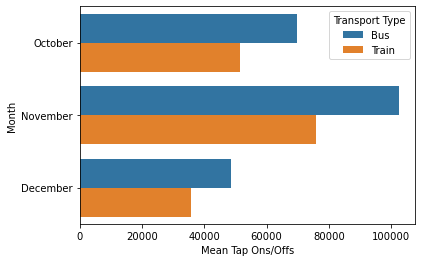

In [7]:
#Bar Chart for the 4th term dataframe 
columns1= ['Transport Type', 'October', 'November', 'December']
df1 = pd.DataFrame(data=df_4term, columns=columns1)

table = pd.pivot_table(df1, index='Transport Type', aggfunc=np.mean)

table_long = pd.melt(table.reset_index(), id_vars='Transport Type', var_name='Month', value_name="Mean Tap Ons/Offs")
ax = sns.barplot(data=table_long, x="Mean Tap Ons/Offs" , y='Month',
                 orient='horizontal', hue='Transport Type', order=columns1[1:])
plt.style.use("dark_background")

In the 4th term phase, the highest difference between the two modes of transport and the highest average amount of student travellers in both modes of transport is in November. 

### Plotting For Summer Break 

In [8]:
#Filtering the values of December to February  
df_break = df_clean[['Transport Type','December', 'January', 'February']]  
df_break.shape

(41, 4)

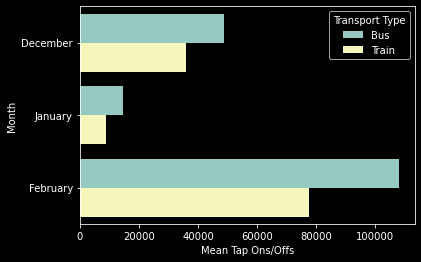

In [9]:
#Bar Chart for the Summer Vacation dataframe 
columns2= ['Transport Type','December', 'January', 'February']
df2 = pd.DataFrame(data=df_break, columns=columns2)

table = pd.pivot_table(df2, index='Transport Type', aggfunc=np.mean)

table_long = pd.melt(table.reset_index(), id_vars='Transport Type', var_name='Month', value_name="Mean Tap Ons/Offs")
ax = sns.barplot(data=table_long, x="Mean Tap Ons/Offs" , y='Month',
                 orient='horizontal', hue='Transport Type', order=columns2[1:])
plt.style.use("dark_background")

In the Summer Break Phase, A significant difference can be seen between Bus travelling students and train travelling students in month of February. The lowest difference between both modes of transport and the lowest average travellers for both modes of transport is January. 

## Plot For Covid Lockdown

In [10]:
#Filtering the values of March to July 
df_covid = df_clean[['Transport Type','March', 'April', 'May','June','July']]  
df_covid.shape

(41, 6)

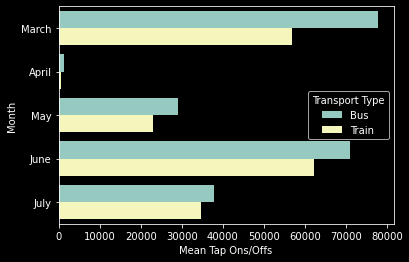

In [11]:
#Bar Chart for COVID-Lockdown dataframe 
columns3= ['Transport Type','March', 'April', 'May','June','July']
df3 = pd.DataFrame(data=df_covid, columns=columns3)

table = pd.pivot_table(df3, index='Transport Type', aggfunc=np.mean)

table_long = pd.melt(table.reset_index(), id_vars='Transport Type', var_name='Month', value_name="Mean Tap Ons/Offs")
ax = sns.barplot(data=table_long, x="Mean Tap Ons/Offs" , y='Month',
                 orient='horizontal', hue='Transport Type', order=columns3[1:])
plt.style.use("dark_background")

In the Lockdown phase, A significant difference can be seen between Bus travelling students and train travelling students in month of March. Almost no students were travelling during the month of April in both modes of transport.  

### Plot For Post-Covid 

In [12]:
#Filtering the values of July to September
df_post = df_clean[['Transport Type','July', 'August', 'September']]  
df_post.shape

(41, 4)

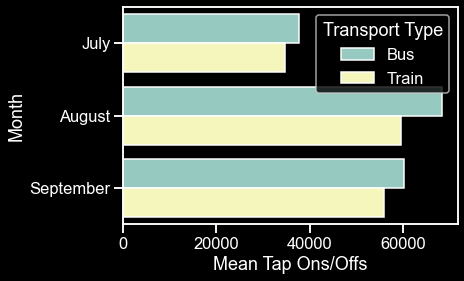

In [127]:
#Bar Chart for the Post-Lockdown dataframe 
columns4= ['Transport Type','July', 'August', 'September']
df4 = pd.DataFrame(data=df_post, columns=columns4)

table = pd.pivot_table(df4, index='Transport Type', aggfunc=np.mean)

table_long = pd.melt(table.reset_index(), id_vars='Transport Type', var_name='Month', value_name="Mean Tap Ons/Offs")
ax = sns.barplot(data=table_long, x="Mean Tap Ons/Offs" , y='Month',
                 orient='horizontal', hue='Transport Type', order=columns4[1:])
plt.style.use("dark_background")

In the Post Lockdown Phase, August and September doesn't have much difference between the months but a significant difference can be seen between Bus travelling students and train travelling students in month of August. 

## Plotting For Pre-COVID 

In [82]:
df_before = df_clean[['Transport Type', 'October', 'November', 'December', 'January', 'February']]  
df_bbus = df_before[df_before["Transport Type"] == 'Bus']
df_btrain = df_before[df_before["Transport Type"]== 'Train']
print(df_bbus.shape)
print(df_btrain.head())

(26, 6)
   Transport Type   October  November  December  January  February
27          Train   50398.0   73483.0   37711.0   7222.0   70329.0
28          Train  115340.0  171494.0   83725.0  21138.0  177074.0
29          Train   17571.0   27988.0   11559.0   2479.0   23223.0
30          Train    1620.0    2693.0    1087.0    198.0    2519.0
31          Train   23260.0   32396.0   14967.0   3938.0   30193.0


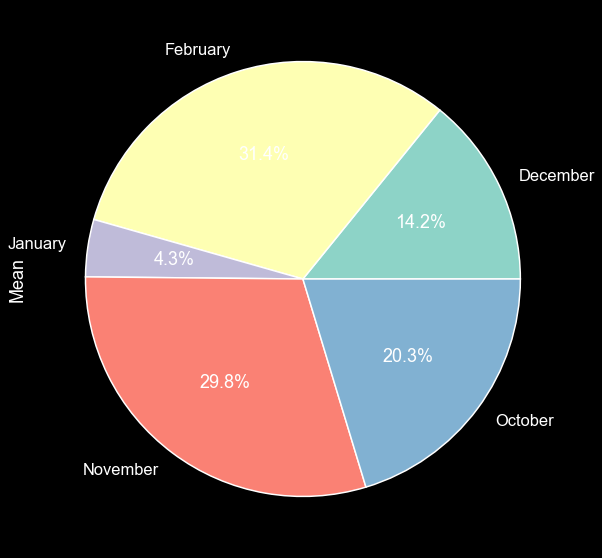

In [125]:
#Pie Plot for PRE-COVID times 
#BUS
columnsb= ['Transport Type', 'October', 'November', 'December', 'January', 'February']
df5 = pd.DataFrame(data=df_bbus, columns=columnsb)
table_bus = pd.pivot_table(df5, index='Transport Type', aggfunc=np.mean)
table_long_bus = pd.melt(table_bus.reset_index(), id_vars='Transport Type', var_name='Month', value_name="Mean")
table_long_bus.plot.pie(x='Month', y='Mean', labels=table_long_bus['Month'], legend=False, figsize=(10, 10),autopct='%1.1f%%')



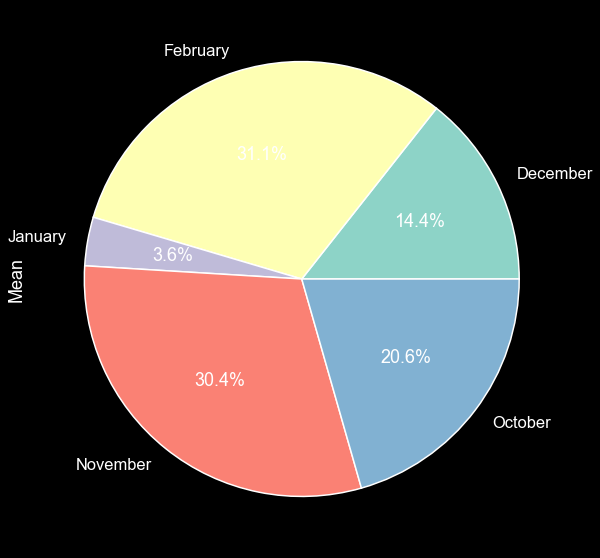

In [124]:
#Train
columnsb= ['Transport Type', 'October', 'November', 'December', 'January', 'February']
df6 = pd.DataFrame(data=df_btrain, columns=columnsb)
table_train = pd.pivot_table(df6, index='Transport Type', aggfunc=np.mean)

table_long_train = pd.melt(table_train.reset_index(), id_vars='Transport Type', var_name='Month', value_name="Mean")
table_long_train.plot.pie(x='Month', y='Mean', labels=table_long_train['Month'], legend=False, figsize=(10, 10),autopct='%1.1f%%')


The Pie plots for bus and train before COVID shows that although most of the average tap on's and off's are closely similar, there are months which shows observable difference between Bus and train tap ons and offs. Before COVID, January has the least amount of average tap ons and offs for both buses and trains but also has the least amount of similarity with 0.7% difference. While the highest average tap ons and offs in buses and trains is in the month of February but the highest similarity between the two modes of transport is in the month of December with 0.2% difference.   

## Plotting For COVID

In [116]:
df_during = df_clean[['Transport Type', 'March','April','May','June','July','August','September']]  
df_dbus = df_during[df_during["Transport Type"] == 'Bus']
df_dtrain = df_during[df_during["Transport Type"]== 'Train']
print(df_dbus.shape)
print(df_dtrain.shape)

(26, 8)
(15, 8)


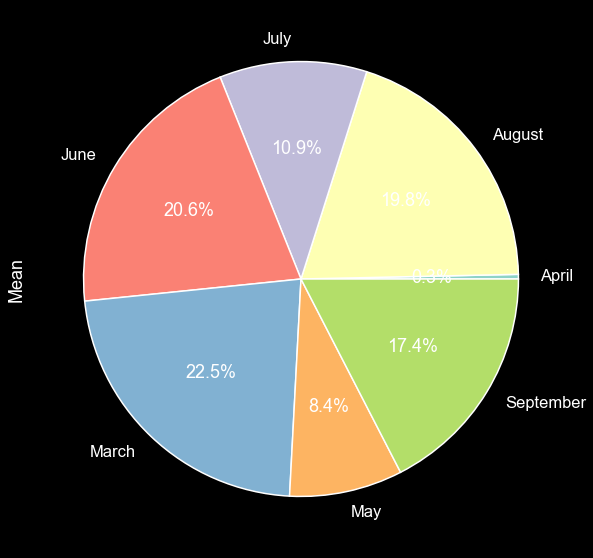

In [123]:
#Pie Plot for During-COVID times 
#BUS
columnsd= ['Transport Type', 'March','April','May','June','July','August','September']
df7 = pd.DataFrame(data=df_dbus, columns=columnsd)
table_dbus = pd.pivot_table(df7, index='Transport Type', aggfunc=np.mean)
table_long_dbus = pd.melt(table_dbus.reset_index(), id_vars='Transport Type', var_name='Month', value_name="Mean")
table_long_dbus.plot.pie(x='Month', y='Mean', labels=table_long_dbus['Month'], legend=False, figsize=(10, 10),autopct='%1.1f%%')

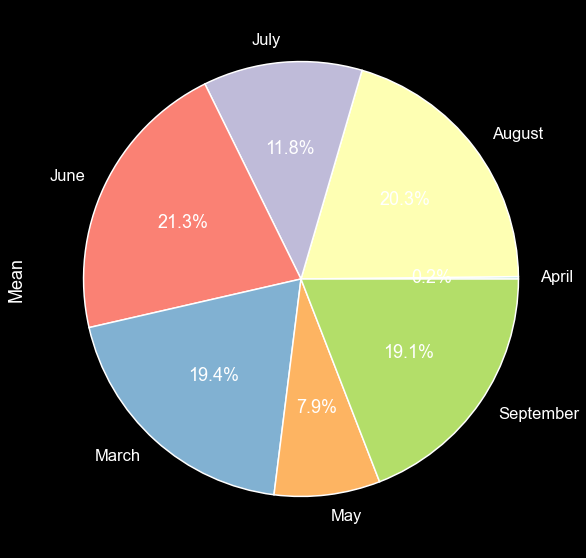

In [122]:
#Train
columnsd= ['Transport Type','March','April','May','June','July','August','September']
df8 = pd.DataFrame(data=df_dtrain, columns=columnsd)
table_dtrain = pd.pivot_table(df8, index='Transport Type', aggfunc=np.mean)

table_long_dtrain = pd.melt(table_dtrain.reset_index(), id_vars='Transport Type', var_name='Month', value_name="Mean")
table_long_dtrain.plot.pie(x='Month', y='Mean', labels=table_long_dtrain['Month'], legend=False, figsize=(10, 10),autopct='%1.1f%%')

The Pie plots for bus and train respectively shows that although most of the average tap on's and off's are closely similar, there are months which shows observable difference between Bus and train tap ons and offs. During Lockdown, April has the least amount of tap ons and offs for both buses and trains and also has the least amount of difference with 0.1% difference. While the highest average tap ons and offs in buses and trains is the months March and June respectively but the highest difference between the two modes of transport is in the month of March with 3.1% difference.   

## Plotting For the Whole Time Frame

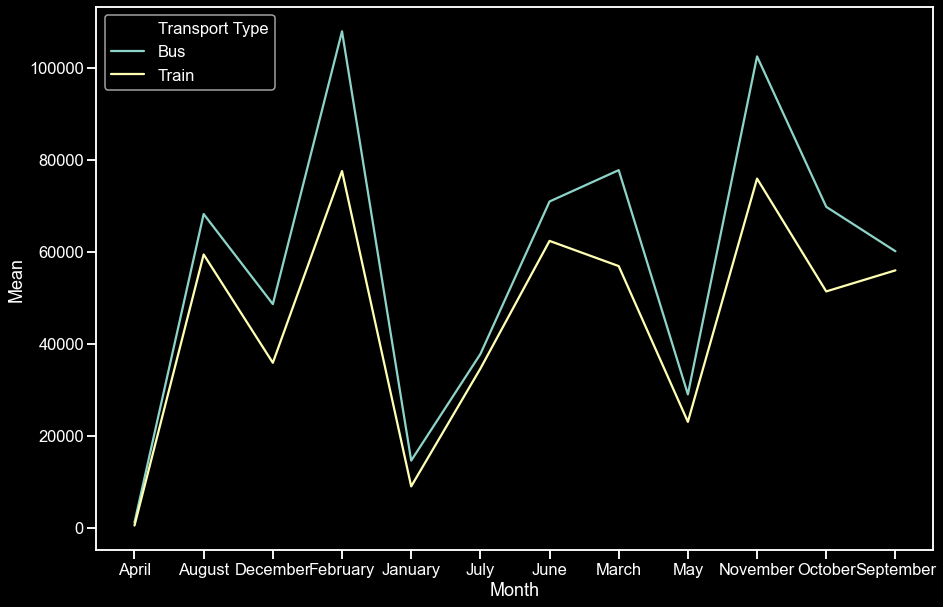

In [108]:
columns_all= ['Transport Type', 'October', 'November', 'December', 'January', 'February','March','April','May','June','July','August','September']
columns_order = columns_all.remove('Transport Type')
df9= pd.DataFrame(data=df_clean, columns=columns_all)
table_all = pd.pivot_table(df7, index='Transport Type', aggfunc=np.mean)
table_long_all = pd.melt(table_all.reset_index(), id_vars='Transport Type', var_name='Month', value_name="Mean")
plt.figure(figsize=(15, 10))
ax = sns.lineplot(data=table_long_all, x='Month', y='Mean', hue='Transport Type', sort=False)

From the Line Plot, it is evident that Average number of Students travelling in buses are always higher than those travelling in Trains. The lowest points for both modes of transport are occuring in months April, January and May. However, the highest points for both modes of transport occurs in the months November and February.  